<a href="https://colab.research.google.com/github/jahanavisanda/Disaster-Tweets-Analysis-using-NLP-and-Machine-Learning-/blob/master/CNST_tweets_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-processing

In [ ]:
###########################PRE-PROCESSING####################
import pandas as pd
import nltk
nltk.download('stopwords')

# read by default 1st sheet of an excel file
df = pd.read_excel('/content/dataset.xlsx')
df = df[['tweet', 'Label 1']]


#transform y
df['label'] = 0
df.loc[df['Label 1'] == 'POWER OUTAGE', 'label'] = 1
df.loc[df['Label 1'] == 'FOOD SHORTAGE', 'label'] = 2
df.loc[df['Label 1'] == 'HOUSE TEMPERATURE', 'label'] = 3
df.loc[df['Label 1'] == 'PREPARATION FOR THE WINTER STORM', 'label'] = 4
df.loc[df['Label 1'] == 'INJURIES', 'label'] = 5
df.loc[df['Label 1'] == 'WATER OUTAGE', 'label'] = 6
df.loc[df['Label 1'] == 'HOUSE DAMAGE', 'label'] = 7
df.loc[df['Label 1'] == 'ALTERNATIVE HEATING', 'label'] = 8
df.loc[df['Label 1'] == 'INTERNET CONNECTION', 'label'] = 9
df.loc[df['Label 1'] == 'PHONE SERVICE', 'label'] = 10


#Removing Punctuations, Numbers, and Special Characters

df['processed_tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")
df['processed_tweet'] = df['tweet'].str.replace("#", "")

#remove empty tweet
df['processed_tweet']=df['processed_tweet'].fillna("")


# get most common words in training dataset
from collections import Counter
all_words = []
for line in list(df['processed_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

a=Counter(all_words).most_common(10)

#tokenization
df['processed_tweet'] = df['processed_tweet'].apply(lambda x: x.split())


#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df['processed_tweet']= df['processed_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])


#remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

#normalize tweet
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
df['processed_tweet'] = df['processed_tweet'].apply(process)

def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    return to_return
df['processed_tweet'] = df['processed_tweet'].apply(string)


# Create New DataFrame of Specific column by DataFrame.assign() method.
data = pd.DataFrame().assign(processed_tweet=df['processed_tweet'], label=df['label'])
print(data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-39-4b95d9f0c2d2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = 0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-39-4b95d9f0c2d2>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['

                                        processed_tweet  label
0     occupi @cpsenergi warm roll storm build sinc k...      0
1     realli carri need shut hebâ€™s. thereâ€™ itâ€™...      0
2     ðÿ¤¦ðÿ_x008f_»â€_x008d_â™€ï¸_x008f_ gonna yâ€™...      0
3                 ice way -prayer storm texa anoth head      0
4     confirm storm. @mysaw suppli winter water weat...      0
...                                                 ...    ...
2316  south water, service. storm texa doesnâ€™t kno...     10
2317      outag trippin internet ... xfiniti @markie_ge      9
2318                                area outag internet      9
2319  went servic middl mg ima cri kbye electr mf wh...      9
2320  teacher closur virtual 16. extracurricular man...      9

[2321 rows x 2 columns]


#Train/Test Split

In [ ]:
#Split data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["processed_tweet"],
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

training set : (1856,) (1856,)
testing set : (465,) (465,)
(1856, 5992)
(1856, 5992)
(465, 5992)
(465, 5992)


#Decision Tree

In [ ]:
#MODEL BUILDING
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
model_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 123,max_depth=10, min_samples_leaf=6)
model_gini.fit(x_train_tfidf, y_train)
predictions = model_gini.predict(x_test_tfidf)

#MODEL EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

print("ACCURACY SCORE",accuracy_score(y_test,predictions)*100)
print("MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))
# print("CONFUSION MATRIX",confusion_matrix(y_test,predictions))
print("F1 SCORE",f1_score(y_test,predictions,average='macro'))
print("PRECISION SCORE",precision_score(y_test,predictions,average='macro'))
print("RECALL SCORE",recall_score(y_test,predictions,average='macro'))

ACCURACY SCORE 80.0
MEAN SQUARE ERROR 4.202150537634409
F1 SCORE 0.25300002325537685
PRECISION SCORE 0.2786959281320183
RECALL SCORE 0.2495906629705433


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(y_test, predictions)
target_names = ['POWER OUTAGE', 'FOOD SHORTAGE', 'HOUSE TEMPERATURE', 'PREPARATION FOR THE WINTER STORM', 'INJURIES', 'WATER OUTAGE'
'HOUSE DAMAGE', 'ALTERNATIVE HEATING', 'INTERNET CONNECTION','PHONE SERVICE' ]
#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
accuracies_decision = cm.diagonal()
# #array([1.        , 0.        , 0.66666667])
for class_name, accuracy in zip(target_names, accuracies_decision):
  print("{}: {}".format(class_name,accuracy*100))

POWER OUTAGE: 93.1129476584022
FOOD SHORTAGE: 43.103448275862064
HOUSE TEMPERATURE: 0.0
PREPARATION FOR THE WINTER STORM: 0.0
INJURIES: 0.0
WATER OUTAGEHOUSE DAMAGE: 0.0
ALTERNATIVE HEATING: 25.0
INTERNET CONNECTION: 0.0
PHONE SERVICE: 30.0


#Random Forest

In [ ]:
#MODEL BUILDING
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

#MODEL EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

print("ACCURACY SCORE",accuracy_score(y_test,predictions)*100)
print("MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))
# print("CONFUSION MATRIX",confusion_matrix(y_test,predictions))
print("F1 SCORE",f1_score(y_test,predictions,average='macro'))
print("PRECISION SCORE",precision_score(y_test,predictions,average='macro'))
print("RECALL SCORE",recall_score(y_test,predictions,average='macro'))



ACCURACY SCORE 80.21505376344086
MEAN SQUARE ERROR 4.172043010752688
F1 SCORE 0.17612724593238757
PRECISION SCORE 0.197379679144385
RECALL SCORE 0.16577286112766307


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, predictions)
target_names = ['POWER OUTAGE', 'FOOD SHORTAGE', 'HOUSE TEMPERATURE', 'PREPARATION FOR THE WINTER STORM', 'INJURIES', 'WATER OUTAGE'
'HOUSE DAMAGE', 'ALTERNATIVE HEATING', 'INTERNET CONNECTION','PHONE SERVICE' ]
#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
accuracies_random = cm.diagonal()
# #array([1.        , 0.        , 0.66666667])
for class_name, accuracy in zip(target_names, accuracies_random):
  print("{}: {}".format(class_name,accuracy*100))

POWER OUTAGE: 96.14325068870524
FOOD SHORTAGE: 36.206896551724135
HOUSE TEMPERATURE: 0.0
PREPARATION FOR THE WINTER STORM: 0.0
INJURIES: 0.0
WATER OUTAGEHOUSE DAMAGE: 0.0
ALTERNATIVE HEATING: 0.0
INTERNET CONNECTION: 0.0
PHONE SERVICE: 0.0


## SVM

In [ ]:
#MODEL BUILDING
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear',gamma = 'scale', shrinking = False, probability=True)
# model_svm.fit(x_train_tfidf,y_train)
model_svm.fit(x_train_tfidf,y_train)
predictions = model_svm.predict(x_test_tfidf)

#MODEL EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

print("ACCURACY SCORE",accuracy_score(y_test,predictions)*100)
print("MEAN SQUARE ERROR",mean_squared_error(y_test,predictions))
# print("CONFUSION MATRIX",confusion_matrix(y_test,predictions))
print("F1 SCORE",f1_score(y_test,predictions,average='macro'))
print("PRECISION SCORE",precision_score(y_test,predictions,average='macro'))
print("RECALL SCORE",recall_score(y_test,predictions,average='macro'))

ACCURACY SCORE 81.93548387096774
MEAN SQUARE ERROR 3.574193548387097
F1 SCORE 0.25824345838495116
PRECISION SCORE 0.35681438919861946
RECALL SCORE 0.23528243391452283


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, predictions)
target_names = ['POWER OUTAGE', 'FOOD SHORTAGE', 'HOUSE TEMPERATURE', 'PREPARATION FOR THE WINTER STORM', 'INJURIES', 'WATER OUTAGE',
'HOUSE DAMAGE', 'ALTERNATIVE HEATING', 'INTERNET CONNECTION','PHONE SERVICE' ]
#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
accuracies_svm = cm.diagonal()
# #array([1.        , 0.        , 0.66666667])
for class_name, accuracy in zip(target_names, accuracies_svm):
  print("{}: {}".format(class_name,accuracy*100))

POWER OUTAGE: 95.59228650137742
FOOD SHORTAGE: 46.55172413793103
HOUSE TEMPERATURE: 0.0
PREPARATION FOR THE WINTER STORM: 0.0
INJURIES: 0.0
WATER OUTAGE: 0.0
HOUSE DAMAGE: 0.0
ALTERNATIVE HEATING: 0.0
INTERNET CONNECTION: 10.0
PHONE SERVICE: 66.66666666666666


# Accuracy of the models for different classes

In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(target_names, accuracies_decision*100, accuracies_random*100, accuracies_svm*100)),
               columns =['Class Name', 'Decision Tree', 'Random Forests', 'SVM'])
df

,Class Name,Decision Tree,Random Forests,SVM
0,POWER OUTAGE,93.112948,96.143251,95.592287
1,FOOD SHORTAGE,43.103448,36.206897,46.551724
2,HOUSE TEMPERATURE,0.000000,0.000000,0.000000
3,PREPARATION FOR THE WINTER STORM,0.000000,0.000000,0.000000
4,INJURIES,0.000000,0.000000,0.000000
5,WATER OUTAGE,0.000000,0.000000,0.000000
6,HOUSE DAMAGE,25.000000,0.000000,0.000000
7,ALTERNATIVE HEATING,0.000000,0.000000,0.000000
8,INTERNET CONNECTION,30.000000,0.000000,10.000000
9,PHONE SERVICE,83.333333,50.000000,66.666667


#Evaluation

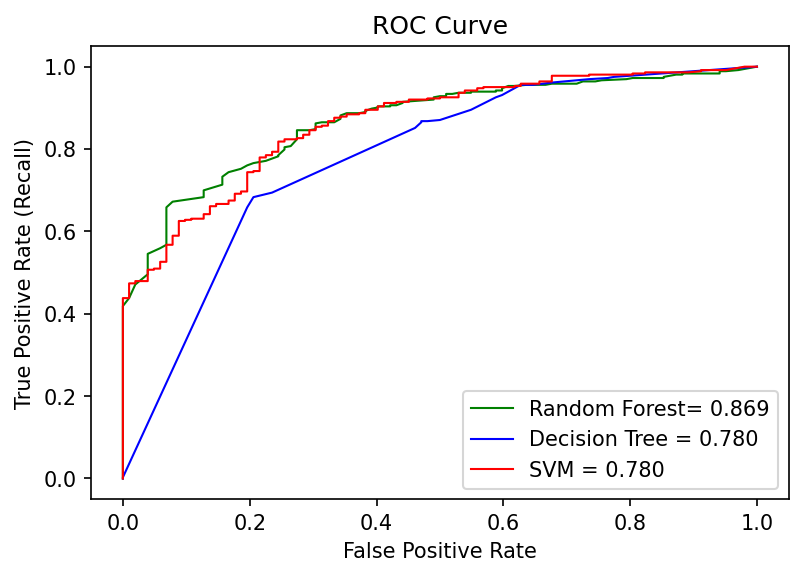

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
probas = model.predict_proba(x_test_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)

decision_prob = model_gini.predict_proba(x_test_tfidf)
fpr_d, tpr_d, thresholds_d = roc_curve(y_test, decision_prob[:,0], pos_label=0)

svm_prob = model_svm.predict_proba(x_test_tfidf)
fpr_s, tpr_s, thresholds_s = roc_curve(y_test, svm_prob[:,0], pos_label=0)

# get area under the curve
roc_auc = auc(fpr, tpr)
roc_auc_decision = auc(fpr_d, tpr_d)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'Random Forest= {roc_auc:.3f}')
plt.plot(fpr_d, tpr_d, lw=1, color='blue', label=f'Decision Tree = {roc_auc_decision:.3f}')
plt.plot(fpr_s, tpr_s, lw=1, color='red', label=f'SVM = {roc_auc_decision:.3f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()




# References:
* https://github.com/Shrneha/Twitter-sentiment-analysis/blob/master/Twitter.ipynb
*   https://medium.com/analytics-vidhya/twitter-sentiment-analysis-8ef90df6579c

